# numpy チートシート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## データ準備

## Boston Housingデータ

In [2]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
display(df.head())

X=df.iloc[:,:df.shape[1]-1]
y=df['MEDV']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## X.ndim
numpy配列のテンソルの次元を出力する。単純な数値一つは0次元。np.array([1,2,3])は３次元ベクトルで、１次元テンソルなので注意

In [10]:
# ベクトルは軸を1つ持つので1次元テンソル
X1=np.array([1,2,3])
print(X1.ndim)

# 行列は行と列の2つの次元をもつので2次元テンソル
X2=np.array([[5,78,2,43,2],
            [3,6,8,4,34],
            [7,65,3,2,76]])
print(X2.ndim)

X3=np.array([[[5,78,2,43,2],
            [3,6,8,4,34],
            [7,65,3,2,76]],
            [[5,78,2,43,2],
            [3,6,8,4,34],
            [7,65,3,2,76]]])
print(X3.ndim)
print(X3.shape)

1
2
3
(2, 3, 5)


## np.expand_dims(img_tensor,axis=0)
img_tensorに0列目に次元を増やす。axisで場所を指定

## np.zeros((15,16))
 15×16の要素がすべて0のnumpy配列を作成

## np.zeros_like(data)
入力データと同じ形の要素が0の配列を返す

In [7]:
x = np.arange(6)
x = x.reshape((2, 3))
print(x)

print(np.zeros_like(x))

[[0 1 2]
 [3 4 5]]
[[0 0 0]
 [0 0 0]]


## np.identity(n, dtype=float)
n×n の単位行列を作成する

In [23]:
np.identity(3, dtype=float)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## np.where(X>=0,1,-1)
 行列X中の様子で0以上(条件)のものは1,0以下のものは-1にする
 ステップ関数で利用

In [8]:
a = np.arange(9).reshape((3, 3))
print(a)
# 行列aの要素で4以上のものは１,4以下は-1にする
np.where(a>=4,1,-1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[-1, -1, -1],
       [-1,  1,  1],
       [ 1,  1,  1]])

## np.arange(1,10,2)
Python のrange(1,10,2)に対応し、等差数列のnumpy行列を作成

In [10]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

## np.meshgrid(x,y)
格子座標を作成する便利な関数

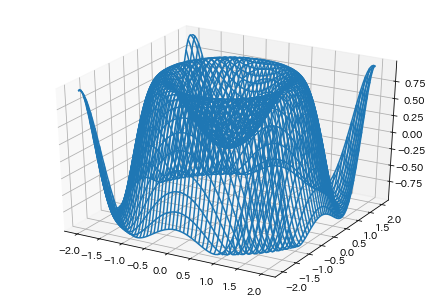

In [18]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-2 ,2 ,100)
y = np.linspace(-2, 2, 100)

xx , yy =np.meshgrid(x, y)
ret = np.sin(xx**2+yy**2)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(xx, yy ,ret)
plt.show()

## 行と要素を指定　X[:,[2,3]]
行列Xをすべての行表示し、２列目と３列目をとりだす

In [5]:
from sklearn import datasets
iris=datasets.load_iris()
print(iris.data[:5])
print(iris.data[:5,[2,3]])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


## np.unique(X,return_counts=True)
重複を削除した配列をつくる.return_coutns=Trueで出現回数をタプルで返してくれる

In [13]:
x=[1,2,2,2,3,3,4]
y=['aa','aa','bb','bb','cc']
print(np.unique(x,return_counts=True))
print(np.unique(y))

(array([1, 2, 3, 4]), array([1, 3, 2, 1]))
['aa' 'bb' 'cc']


### 値が一つだけの特徴量があるか確認
値が一つの特徴量は情報量としては、意味がないので削除したほうがよい

In [13]:
def check_const_feature(df):
    cols=df.columns
    counts=[]
    for c in cols:
        if len(np.unique(df[c]))==1:
            counts.append(c)
    return counts

df=pd.DataFrame({'col1':[1,1,1],'col2':[1,2,3],'col3':[4,5,5]})
check_const_feature(df)

['col1']

## np.bincount(X,weight=1)
配列の0以上の整数が登場した回数を表す。weightはサンプルに対する重み付け（使いどこは謎）  
結果は、0が登場した回数、1が登場した回数……と続く。とてもわかりやすい  
配列Xに0以下の値があるとエラーを吐くので注意

In [24]:
np.random.seed(0)
x=np.random.randint(0,10,10)
print(x)
print(np.bincount(x))

[5 0 3 3 7 9 3 5 2 4]
[1 0 1 3 1 2 0 1 0 1]



## np.hstack((x1,x2))
配列を水平方向につなげる  
https://deepage.net/features/numpy-stack.html

In [17]:
x1=np.arange(10)
x2=np.arange(3)

print(x1)
print(x2)
print(np.hstack((x1,x2)))

y1=np.arange(12).reshape(2,2,3)
y2=np.arange(6).reshape(2,1,3)

print(y1)
print(y2)
print(np.hstack((y1,y2)))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]
[0 1 2 3 4 5 6 7 8 9 0 1 2]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
[[[0 1 2]]

 [[3 4 5]]]
[[[ 0  1  2]
  [ 3  4  5]
  [ 0  1  2]]

 [[ 6  7  8]
  [ 9 10 11]
  [ 3  4  5]]]


## np.vstack((x1,x2))
縦方向に連結する 列数があってないとエラー吐く

In [23]:
np.vstack(([1,2],[2,3]))

array([[1, 2],
       [2, 3]])

## np.r_[x1, x2], np.c_[x1, x2]
np.r_はhstack, np.c_はvstackと同様の操作を行える  
https://deepage.net/features/numpy-cr.html

In [3]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
print(np.r_[x1, x2])
print(np.c_[x1, x2])

[1 2 3 4 5 6]
[[1 4]
 [2 5]
 [3 6]]


## np.random.randn(200,2)
標準正規分布に従う乱数を要素に持つ200行2列の行列を作成

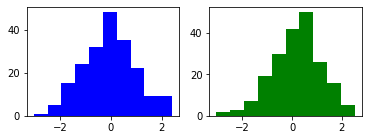

In [37]:
X=np.random.randn(200,2)
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(6,2))
ax[0].hist(X[:,0],color='blue')
ax[1].hist(X[:,1],color='green')
plt.show()

## np.logical_xor(X[:,0]>0,X[:,1]>0)
排他的論理和(入力の2つの信号のうち、一方が1のときにだけ1を出力する)で、bool値を返す

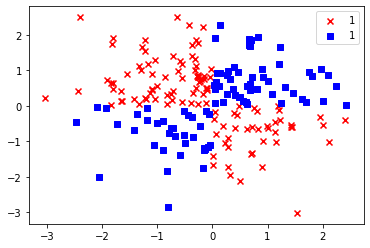

In [58]:
y_xor=np.logical_xor(X[:,0]>0,X[:,1]>0)
y_xor=np.where(y_xor,1,-1)
plt.scatter(X[y_xor==1,0],X[y_xor==1,1],c='r',marker='x',label='1')
plt.scatter(X[y_xor==-1,0],X[y_xor==-1,1],c='b',marker='s',label='1')
plt.legend()
plt.show()

## np.cov(X.T)
Xの分散共分散行列(Covariacne matrix)を作成してくれる。PCAで役に立つ。

## eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
行列から、固有値と対応数する固有ベクトルを求めてくれる。np.cov()から分散共分散行列を求めて、  
np.linalg.eigでその固有値を求められるためPCAで使われる

## np.cumsum(var_exp)
累積和を求める。分散説明率の累積和を求める時に使える

## 列ベクトルと行ベクトルの生成の違い
## np.array([1,2,3])　行ベクトル
## np.array([[1],[2],[3]])　列ベクトル
行列をつなげるnp.hstackをしていて詰まった。
## array([1,2,3])[:,np.newaxis]
とすれば、行ベクトルを明示的に列ベクトルに変換できるので便利

In [13]:
a=np.array([1,2,3])
b=np.array([[1],[2],[3]])
print(a)
print(b)
print(a[:,np.newaxis])

[1 2 3]
[[1]
 [2]
 [3]]
[[1]
 [2]
 [3]]


## np.asarray(X)
引数Xがnp.ndarrayの場合にコピーされる np.array(X ,copy=False)と同義

In [3]:
a=np.array([1,2,3])
b=np.array(a)
c=np.asarray(a)
print(a is b)
print(a is c)

False
True


## X.reshape((2, 3))
ディープラーニングのテンソルの変形でよく行われる。目的の形状と一致するように行と列の配置を変更すること

In [40]:
X=np.array([[0,1],
            [3,4],
            [6,7]])
print(X.shape)
print(X.reshape((2,3)))
print(X.reshape((6,1)))

(3, 2)
[[0 1 3]
 [4 6 7]]
[[0]
 [1]
 [3]
 [4]
 [6]
 [7]]


## np.transpose(X)　　X.T
行列の転置を行なう

In [53]:
X=np.arange(1,9).reshape(2,4)
print(X)
print(np.transpose(X))

[[1 2 3 4]
 [5 6 7 8]]
[[1 5]
 [2 6]
 [3 7]
 [4 8]]


## np.linalg.inv(X)
入力行列の逆行列を求めてくれる便利な関数

In [22]:
X = np.random.randint(-9, 10, size=(2 ,2))
print(X)

X_inv = np.linalg.inv(X)
print(X_inv)

print(np.dot(X, X_inv))

[[-7  7]
 [ 4  1]]
[[-0.02857143  0.2       ]
 [ 0.11428571  0.2       ]]
[[ 1.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  1.00000000e+00]]


## np.set_printoptions(precision=4,suppress=True)
numpy配列を有効数字4桁で表示する suppressで指数表示を禁止する

## np.linspace(0.1,1.0,10)
0.1から1までを10等分した値を要素に持つnumpy配列を作る

In [12]:
print(np.linspace(0.1,1,10))
print(np.array([i*0.1 for i in range(1,11)]))

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


## 乱数生成

## np.random.rand(10)
0~1の乱数を10個生成。

## np.random.randn(10)
平均0,標準偏差1の標準正規分布に従う乱数を10個生成

## np.random.normal(50,10,10)
平均50,標準偏差10の分布に従う乱数を10個生成

## np.random.binomial(n=100, p=0.5)
表が出る確率0.5のコインを100回投げた時に表がでる回数を出力

## np.random.randint(0,100,20)
0～99の整数を20個生成

## np.random.choice(list,5,replace=False,p=weight)
listの中からランダムに5つ抽出。replaceで重複を認めるか決められる。pで各要素の選ばれやすさの重みづけを行う

## 相関係数を計算
特徴量ペアの線形関係を表す、ピアソンの積率相関係数を計算する
## np.corrcoef(df.values.T)

In [8]:
## Boston Housingデータ
print(df.shape)
cm=np.corrcoef(df.values.T)
print(cm.shape)

(506, 14)
(14, 14)


## ２つの特徴量間の相関係数を求める

In [9]:
cor=np.corrcoef(df['AGE'],df['MEDV'])
print(cor)
print(cor[0,1])

[[ 1.         -0.37695457]
 [-0.37695457  1.        ]]
-0.37695456500459606


## ndarray.flatten()
多次元配列を1次元配列に変換する

In [9]:
a=np.arange(10).reshape(2,5)
print(a)
b=a.flatten()
print(b)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4 5 6 7 8 9]


## np.sort(X)
numpy配列Xを昇順に並び替え

In [14]:
X=np.random.rand(5)
print(X)
print(np.sort(X))

[0.07336971 0.02499979 0.36589211 0.9722168  0.87191087]
[0.02499979 0.07336971 0.36589211 0.87191087 0.9722168 ]


## np.argsort(X)  X.argsort()
numpy配列Xの要素を大きい順にindex番号を取得

In [16]:
X=np.random.randint(0,10,5)
print(X)
print(np.argsort(X))
print(X.argsort())

[2 6 1 8 7]
[2 0 1 4 3]
[2 0 1 4 3]


## numpy配列を逆順にする
## X[::-1]

In [30]:
X=np.random.randint(1,10,5)
print(X)
X=np.sort(X)
print(X)
print(X[::-1])

[5 5 7 1 9]
[1 5 5 7 9]
[9 7 5 5 1]


## np.log(X)
自然対数
## np.log2(X)
底が2の対数
## np.log10(X)
底が10の対数
## np.log1p(X+1)
log(1+x)を計算。Xが0になる可能性がある場合

In [7]:
X=0
# log2を計算している
print(np.log1p(1))

0.6931471805599453


## np.maximum(X, 0)
numpy配列中の要素と、0を比較し、大きい値の配列を返す。X=np.array([1,-2,3])なら、[max(1,0),max(-2,0),max(3,0)]を行なう  
名前がmaxと似ているので同じ関数かと思うが、異なるので気をつける。ReLUの実装でよく出てくる

In [13]:
X=np.array([2,-3,5,-6])
print(np.maximum(X,0))
print(np.max(X))

[2 0 5 0]
5


## numpyの和と積のありがたみを理解

In [21]:
# numpyを使わず和を取る場合
def add(x,y):
    assert x.shape==y.shape
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            x[i, j]+=y[i,j]
    return x

# numpyを使わず積を取る場合
def time(x,y):
    z=0
    assert x.shape[1]==y.shape[0]
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            z=x[i,j]*y[j,i]
    return z
x=np.array([[1,2],[1,2]])
y=np.array([[3,4],[3,4]])
add(x,y)
time(x,y)

24

## numpyのブロードキャスト機能

In [27]:
x=np.random.random((64,28,28,3))
y=np.random.random((28,3))
z=np.maximum(x,y)
print(z.shape)

(64, 28, 28, 3)


## np.dot(X,Y)
2つのテンソル積を行なう

In [35]:
x=np.random.random((3,4))
print(x.shape)
y=np.random.random((4,3))
print(y.shape)
z=np.dot(x,y)
print(z.shape)

(3, 4)
(4, 3)
(3, 3)


## np.prod(X)
配列要素の積を計算する

In [16]:
X = np.random.randint(0, 10, (3, 2))
print(X)
print(np.prod(X, axis=0))

[[0 9]
 [7 9]
 [3 7]]
[  0 567]


## np.intersect1d(X1,X2)
X1,X2の共通要素を返す。結果はソートされて変える

In [2]:
X1=np.array(['A,','B','C','D,','A','C','G'])
X2=np.array(['B','D,','E'])
np.intersect1d(X1,X2)

array(['B', 'D,'], dtype='<U2')

## X.tolist()
numpy配列をpyhtonのlist型に変更する

In [6]:
X=np.arange(10)
X.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## X[np.isnan(X)]=-999
numpy配列の欠損値補完。np.isnanでnanかどうかをbool値で返してくれる。

## np.ceil(3.5)
小数点以下を切り上げる

## np.floor(3.4)
 小数点以下を切り捨てる。

In [6]:
print(np.floor(3.4),np.ceil(3.4))

3.0 4.0


## scipyの取り扱い

In [3]:
from scipy import sparse
import numpy as np
a=sparse.lil_matrix((4,5))
a.toarray

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])